In [15]:
import sys

sys.path.append('.')

import model

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
import seaborn as sns
import statistics

# 2D Lattice with rewiring

We start with an $m \times n$ periodic square lattice.

In [27]:
N, M = (45, 45)

g = nx.grid_2d_graph(N, M, periodic=True, create_using=None)

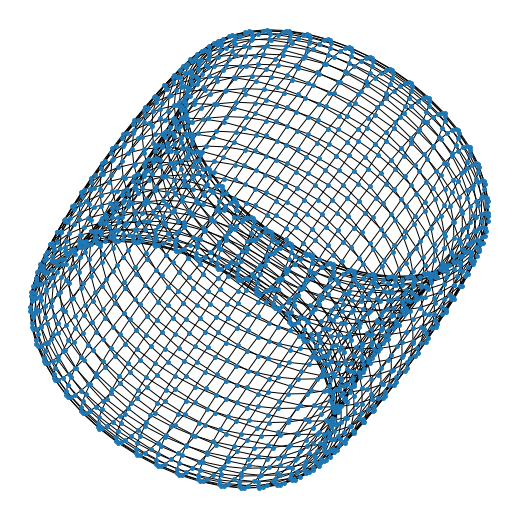

In [28]:
plt.figure(3,figsize=(7,7)) 
## draw_spectral for the lattice
nx.draw_spectral(g,
                node_size = 15)

Then for each edge $(u,v)$, with probability $p$, we replace that edge with a new edge $(u,w)$, where $w$ is randomly sampled from the existing nodes.

In [43]:
g = model.grid_r(N,M, 0.05)

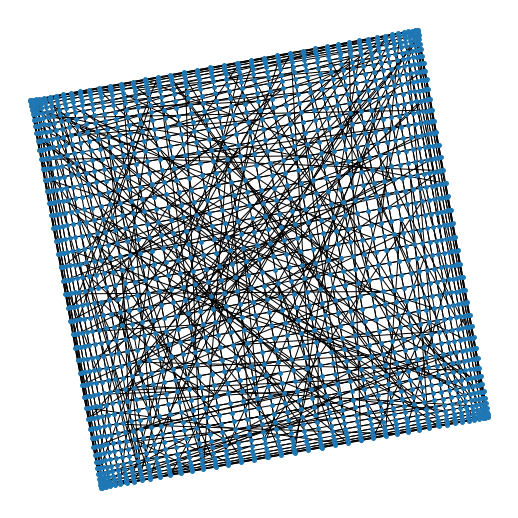

In [44]:
plt.figure(3,figsize=(7,7)) 
## draw_spectral for the lattice
nx.draw(g,
        pos = model.grid_pos(g),
        node_size = 15)

# Looking at infection on the 2D lattice, no contact tracing

We will keep $n = 45$, $m = 45$, which keeps the total number of nodes comparable to the earlier Watts-Strogatz based study.

What is the effect of rewiring rate $p$ on infection, without tracing?

In [36]:
## Population parameters:
base_params = {
    # Node parameter
    'A' : 0.5, 
    
    # Edge parameter
    'W' : .5, # probability of edge activation; 2/K
    'C' : 1.0,
    
    ## Disease parameters

    'beta_hat' : .4, # probability of transmission upon contact
    'alpha' : .25, # probability of exposed becoming infectious
    'gamma' : .1, # probability of infectious becoming recovered
    'zeta' : .1, # probability of infectious becoming symptomatic

    ## Contact tracing parameters

    'limit' : 10, # number of time steps the contact tracing system remembers
}

In [37]:
## Illustrative single simulation

In [38]:
g_live = model.initialize_graph(g, base_params)

t = 0
#g_live = g.copy()
#initialize(g_live,params)
history = {}

s_count = []

while len(model.get_infected(g_live)) > 0 and t < float("inf"):
    if t != 0 and t % len(g_live.nodes()) / 100 == 0:
        print("Trial %d hits time step %d" % (i,t))

    s_count.append(len(model.susceptible(g_live)))

    g_live, history = model.loop(base_params, g_live, history, t)

    t = t + 1

In [39]:
print(model.green_cmap(0))
print(model.green_cmap(t))

(0.9686274509803922, 0.9882352941176471, 0.9607843137254902, 1.0)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


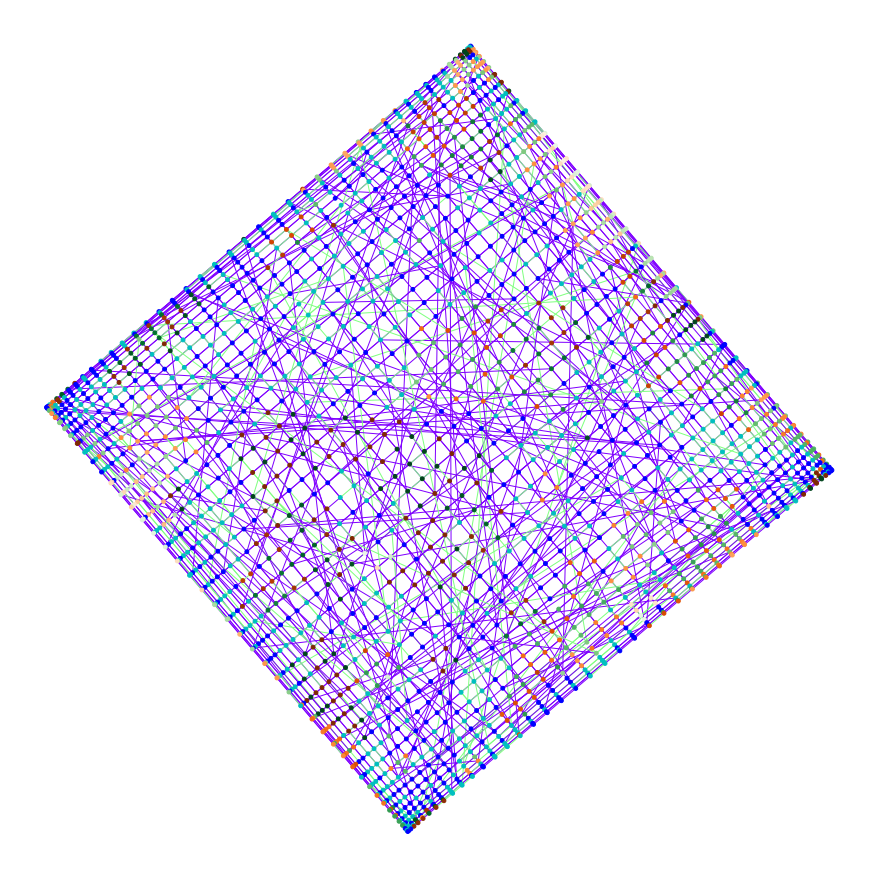

In [40]:
plt.figure(3,figsize=(12,12)) 
## draw_spectral for the lattice
nx.draw(g_live,
        pos = model.grid_pos(g_live),
        node_color = model.node_colors(g_live),
        edge_color = model.edge_colors(g_live),
        node_size = 15)

In [14]:
g_live.nodes[(0,0)]

{'adopter': False,
 'group': 0,
 'quarantined': False,
 'symptomatic': False,
 'tested': False,
 'epi-state': 'Susceptible'}

In [14]:
data

{'time': 68,
 'A': 0.0,
 'W': 0.5,
 'C': 0.0,
 'beta_hat': 0.4,
 'alpha': 0.25,
 'gamma': 0.1,
 'zeta': 0.1,
 'limit': 10,
 'N': 45,
 'M': 45,
 'p': 0.05,
 's_final': 1993,
 'route_adjacent_ratio': 0.8387096774193549,
 'traced_edges': 0,
 'traced_edges_distant': 0,
 'group 0 adoption rate': 0.0,
 'group 1 adoption rate': nan,
 'avg. exp. interval - group 0': 2.473684210526316,
 'avg. exp. interval - group 1': None,
 'avg. eff. inf. interval - group 0': 0.09777777777777778,
 'avg. eff. inf. interval - group 1': None}

## Larger scale simulation

In [12]:
base_params['A'] = 0.0
base_params['C'] = 0.0

In [41]:
def square_lattice_rewiring_case(N, M, p, **kwargs):

    g = nx.grid_2d_graph(N, M, periodic=True)

    for e in g.edges:
        if random.random() <= p:
            g.remove_edge(e[0],e[1])
            v = random.choice(list(g.nodes()))
            g.add_edge(e[0], v)

    g.graph['N'] = N
    g.graph['M'] = M
    g.graph['p'] = p

    return g, kwargs


def square_r_case_generator(N, M, **kwargs):
    def sqrg(**kwargs):
        return square_lattice_rewiring_case(N, M, **kwargs)
    
    return sqrg

In [43]:
conditions = {
    'p-0.000' : {'p' : 0.000},
    'p-0.005' : {'p' : 0.005},
    'p-0.010' : {'p' : 0.010},
    'p-0.025' : {'p' : 0.025},
    'p-0.050' : {'p' : 0.050},
    'p-0.075' : {'p' : 0.075},
    'p-0.100' : {'p' : 0.100},
    'p-0.250' : {'p' : 0.250},
    'p-0.500' : {'p' : 0.500},
    'p-0.750' : {'p' : 0.750},
    'p-1.000' : {'p' : 1.00},
}

In [44]:
def dfr(rs):
    return pd.DataFrame(
        [r for case in rs 
         for r in model.data_from_results(rs, case)])

In [45]:
runs = 100

N, M = (45, 45)

results = model.experiment(
    square_r_case_generator(N, M),
    base_params,
    conditions,
    runs
)

temp = dfr(results)
temp.to_csv('p_square_study.csv')

Starting p-0.000
Initializing input graphs
graphs prepared in 3.4974070909956936
Finished p-0.000 in 135.56684910701006
Starting p-0.005
Initializing input graphs
graphs prepared in 3.0541195730038453
Finished p-0.005 in 196.3755668990052
Starting p-0.010
Initializing input graphs
graphs prepared in 3.7518164189968957
Finished p-0.010 in 164.80179147100716
Starting p-0.025
Initializing input graphs
graphs prepared in 3.1493880490015727
Finished p-0.025 in 270.7085478539957
Starting p-0.050
Initializing input graphs
graphs prepared in 4.212269035997451
Finished p-0.050 in 342.40469763899455
Starting p-0.075
Initializing input graphs
graphs prepared in 4.732791769012692
Finished p-0.075 in 289.13602929700573
Starting p-0.100
Initializing input graphs
graphs prepared in 3.631562729002326
Finished p-0.100 in 233.6796933279984
Starting p-0.250
Initializing input graphs
graphs prepared in 3.3576201609976124
Finished p-0.250 in 197.3631230200117
Starting p-0.500
Initializing input graphs
grap

In [5]:
#temp = dfr(results)
#temp.to_csv('p_square_study.csv')
temp = pd.read_csv('p_square_study.csv')

In [6]:
temp.columns

Index(['Unnamed: 0', 'time', 'A', 'W', 'C', 'beta_hat', 'alpha', 'gamma',
       'zeta', 'limit', 'N', 'M', 'p', 's_final', 'route_adjacent_ratio',
       'traced_edges', 'traced_edges_distant', 'group 0 adoption rate',
       'group 1 adoption rate', 'avg. exp. interval - group 0',
       'avg. exp. interval - group 1', 'avg. eff. inf. interval - group 0',
       'avg. eff. inf. interval - group 1', 'case', 'infected_ratio'],
      dtype='object')

**Infected ratio** needs to be reset because we calculate it originally using a different sense of _N_.

In [7]:
temp['nodes'] = temp['N'] * temp['M']
temp['infected_ratio'] = (temp['nodes'] - temp['s_final']) / temp['nodes']

[Text(0.5, 1.0, '2D Lattice Rewiring and Infectiousness'),
 Text(0.5, 0, 'rewiring rate'),
 Text(0, 0.5, 'infected ratio')]

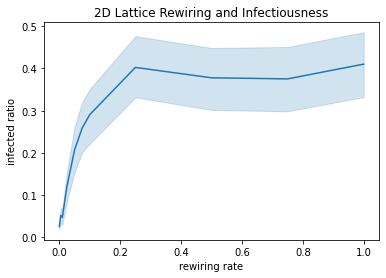

In [8]:
splot = sns.lineplot(x='p', y='infected_ratio', data=temp)
splot.set(title='2D Lattice Rewiring and Infectiousness', xlabel='rewiring rate', ylabel='infected ratio')

In [16]:
## Population parameters:
base_params_A = {
    
    'p' : 0.04, ## picking a p-star
    
    # Node parameter
    'A' : 0.0, # This will vary by condition
    
    # Edge parameter
    'W' : .5, # probability of edge activation; 2/K
    'C' : 1.0, ## no edges can be traced.
    
    ## Disease parameters

    'beta_hat' : .4, # probability of transmission upon contact
    'alpha' : .25, # probability of exposed becoming infectious
    'gamma' : .1, # probability of infectious becoming recovered
    'zeta' : .1, # probability of infectious becoming symptomatic

    ## Contact tracing parameters

    'limit' : 10, # number of time steps the contact tracing system remembers
}

In [17]:
conditions_A = {
    'A-0.000' : {'A' : 0.000},
    'A-0.005' : {'A' : 0.005},
    'A-0.010' : {'A' : 0.010},
    'A-0.025' : {'A' : 0.025},
    'A-0.050' : {'A' : 0.050},
    'A-0.100' : {'A' : 0.100},
    'A-0.500' : {'A' : 0.500},
    'A-1.000' : {'A' : 1.00},
}

In [19]:
runs = 70

N, M = (45, 45)

results = model.experiment(
    square_r_case_generator(N, M),
    base_params_A,
    conditions_A,
    runs
)

temp_A = dfr(results)
temp_A.to_csv('A_square_study.csv')

Starting A-0.000
Initializing input graphs
graphs prepared in 5.443820095999399
Finished A-0.000 in 225.75382787800118
Starting A-0.005
Initializing input graphs
graphs prepared in 2.5941591049995623
Finished A-0.005 in 198.21178883700122
Starting A-0.010
Initializing input graphs
graphs prepared in 2.48061592799786
Finished A-0.010 in 212.870095156999
Starting A-0.025
Initializing input graphs
graphs prepared in 2.487890761000017
Finished A-0.025 in 224.8521382580002
Starting A-0.050
Initializing input graphs
graphs prepared in 2.6333986850004294
Finished A-0.050 in 210.77659455700268
Starting A-0.100
Initializing input graphs
graphs prepared in 2.6538008419993275
Finished A-0.100 in 251.55603742200037
Starting A-0.500
Initializing input graphs
graphs prepared in 3.1735135090020776
Finished A-0.500 in 118.61862749300053
Starting A-1.000
Initializing input graphs
graphs prepared in 2.5524901999997383


ZeroDivisionError: float division by zero

In [ ]:
temp['nodes'] = temp['N'] * temp['M']
temp['infected_ratio'] = (temp['nodes'] - temp['s_final']) / temp['nodes']

In [ ]:
splot = sns.lineplot(x='A', y='infected_ratio', data=temp)